In [1]:
import cv2
import os
from mtcnn import MTCNN

# Input and output paths
raw_image_folder = "raw_images/jamie"
output_folder = "cropped_images/jamie"
os.makedirs(output_folder, exist_ok=True)

detector = MTCNN()

# Loop through all files in raw_images/nedstark
for file_name in os.listdir(raw_image_folder):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp')):
        img_path = os.path.join(raw_image_folder, file_name)

        try:
            img = cv2.imread(img_path)

            if img is None:
                print(f" Could not read {img_path}, skipping...")
                continue

            faces = detector.detect_faces(img)

            if not faces:
                print(f" No face found in {file_name}")
                continue

            for i, face in enumerate(faces):
                try:
                    x, y, w, h = face['box']
                    x, y = max(0, x), max(0, y)

                    cropped_face = img[y:y+h, x:x+w]
                    cropped_face_resized = cv2.resize(cropped_face, (224, 224))

                    save_path = os.path.join(
                        output_folder,
                        f"{os.path.splitext(file_name)[0]}_face_{i+1}.jpg"
                    )
                    cv2.imwrite(save_path, cropped_face_resized)
                    print(f" Saved cropped face: {save_path}")
                except Exception as e:
                    print(f" Error cropping face in {file_name}: {e}")

        except Exception as e:
            print(f" Error processing {file_name}: {e}")


✅ Saved cropped face: cropped_images/jamie\0b113cd4-bac5-40d3-9826-4829a1bdec47_face_1.jpg
✅ Saved cropped face: cropped_images/jamie\1b99576c-7b51-4b24-aa02-679c613d078c_face_1.jpg
✅ Saved cropped face: cropped_images/jamie\1ee7fa3b-d8fb-4f73-a4c1-8cf9d7e7afc2_face_1.jpg
✅ Saved cropped face: cropped_images/jamie\1f1166ef-7b5a-4e16-8065-d103064188d9_face_1.jpg
✅ Saved cropped face: cropped_images/jamie\240d3542-0a4b-4307-9244-532b0115cfde_face_1.jpg
✅ Saved cropped face: cropped_images/jamie\48e9985d-d26a-40b4-82bb-f35c2e964ac0_face_1.jpg
❌ No face found in 50eb3bb7-b632-43e6-aea7-fabff0ab785d.jpeg
✅ Saved cropped face: cropped_images/jamie\59516caf-04c9-4cc6-acad-3c0705c330a1_face_1.jpg
❌ No face found in 7f02c03d-10d3-4680-ad49-fc5e42b8f4d5.jpeg
✅ Saved cropped face: cropped_images/jamie\8369df64-e460-47a6-bb83-102acf474602_face_1.jpg
❌ No face found in 842868-1920x1080-desktop-1080p-jaime-lannister-background-photo.jpg
✅ Saved cropped face: cropped_images/jamie\86906427-c78c-438e-b

In [1]:
import os
import random

# Set the maximum number of images per class
max_images = {
    "train": 105,
    "val": 30,
    "test": 15
}

# Set the folder paths
folders = {
    "train": "dataset/train",
    "val": "dataset/val",
    "test": "dataset/test"
}

def limit_images_per_class(folder_path, max_count):
    for cls in os.listdir(folder_path):
        cls_path = os.path.join(folder_path, cls)
        images = [img for img in os.listdir(cls_path) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp'))]
        
        if len(images) > max_count:
            # Randomly choose images to keep
            keep_images = random.sample(images, max_count)
            # Delete the rest
            for img in images:
                if img not in keep_images:
                    os.remove(os.path.join(cls_path, img))
                    print(f"Deleted {os.path.join(cls_path, img)}")

# Apply for train, val, test
for key in ["train", "val", "test"]:
    limit_images_per_class(folders[key], max_images[key])


Deleted dataset/train\arya\71360_face_1.jpg
Deleted dataset/train\arya\843356-2100x1500-desktop-hd-arya-stark-wallpaper-photo_face_1.jpg
Deleted dataset/train\arya\843429-1397x2100-samsung-hd-arya-stark-wallpaper_face_1.jpg
Deleted dataset/train\arya\843429-1397x2100-samsung-hd-arya-stark-wallpaper_face_1_0_1207.jpg
Deleted dataset/train\arya\Arya Stark (4)_face_1_0_6810.jpg
Deleted dataset/train\arya\Arya Stark icons (1)_face_1_0_4707.jpg
Deleted dataset/train\arya\Arya Stark icons (3)_face_1_0_1963.jpg
Deleted dataset/train\arya\Arya Stark icons (4)_face_1.jpg
Deleted dataset/train\arya\Arya Stark icons (6)_face_1_0_1114.jpg
Deleted dataset/train\arya\Arya Stark icons (7)_face_1.jpg
Deleted dataset/train\arya\Arya Stark icons (7)_face_1_0_3876.jpg
Deleted dataset/train\arya\f3a9e5d2-e525-4c05-aaa1-33bd804628cb_face_1.jpg
Deleted dataset/train\jamie\240d3542-0a4b-4307-9244-532b0115cfde_face_1_0_4316.jpg
Deleted dataset/train\jamie\240d3542-0a4b-4307-9244-532b0115cfde_face_1_0_6431.jpg

In [5]:
import cv2
from mtcnn import MTCNN
import os

# ===== SETTINGS =====
image_path = r"C:\Users\itsme\OneDrive\Pictures\Screenshots\Screenshot 2025-08-28 043244.png"  
output_path = "cropped_jamie.jpg"    
MARGIN = 0.25                          

# ===== FACE DETECTION =====
detector = MTCNN()
img = cv2.imread(image_path)

if img is None:
    print("⚠️ Could not read image, check the path!")
    exit()

faces = detector.detect_faces(img)

if not faces:
    print("❌ No face found in image!")
    exit()

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)

    # Apply margin
    x_margin = int(w * MARGIN)
    y_margin = int(h * MARGIN)

    x1 = max(0, x - x_margin)
    y1 = max(0, y - y_margin)
    x2 = min(img.shape[1], x + w + x_margin)
    y2 = min(img.shape[0], y + h + y_margin)

    # Crop bigger area
    cropped_face = img[y1:y2, x1:x2]
    cropped_face_resized = cv2.resize(cropped_face, (224, 224))

    # Save
    save_path = output_path if len(faces) == 1 else f"cropped_face_{i+1}.jpg"
    cv2.imwrite(save_path, cropped_face_resized)
    print(f"✅ Saved: {save_path}")

    # Show
    cv2.imshow("Cropped Face with Margin", cropped_face_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


✅ Saved: cropped_jamie.jpg


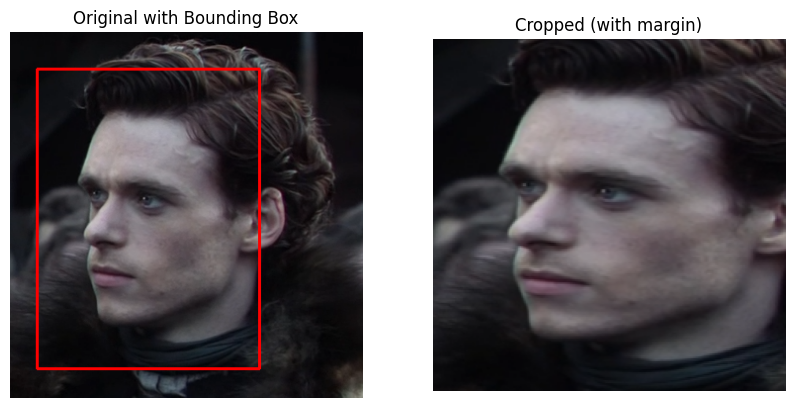

In [6]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# ===== SETTINGS =====
image_path = r"C:\Users\itsme\OneDrive\Pictures\Screenshots\Screenshot 2025-08-28 043244.png"
MARGIN = 0.25   # 25% margin

# ===== FACE DETECTION =====
detector = MTCNN()
img = cv2.imread(image_path)

if img is None:
    print("⚠️ Could not read image, check the path!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for matplotlib
    faces = detector.detect_faces(img_rgb)

    if not faces:
        print("❌ No face found in image!")
    else:
        for i, face in enumerate(faces):
            x, y, w, h = face['box']
            x, y = max(0, x), max(0, y)

            # Apply margin
            x_margin = int(w * MARGIN)
            y_margin = int(h * MARGIN)

            x1 = max(0, x - x_margin)
            y1 = max(0, y - y_margin)
            x2 = min(img.shape[1], x + w + x_margin)
            y2 = min(img.shape[0], y + h + y_margin)

            # Crop bigger area
            cropped_face = img_rgb[y1:y2, x1:x2]
            cropped_face_resized = cv2.resize(cropped_face, (224, 224))

            # ==== SHOW ORIGINAL WITH BBOX & CROPPED ====
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))

            # Original with bounding box
            img_copy = img_rgb.copy()
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
            axs[0].imshow(img_copy)
            axs[0].set_title("Original with Bounding Box")
            axs[0].axis("off")

            # Cropped
            axs[1].imshow(cropped_face_resized)
            axs[1].set_title("Cropped (with margin)")
            axs[1].axis("off")

            plt.show()


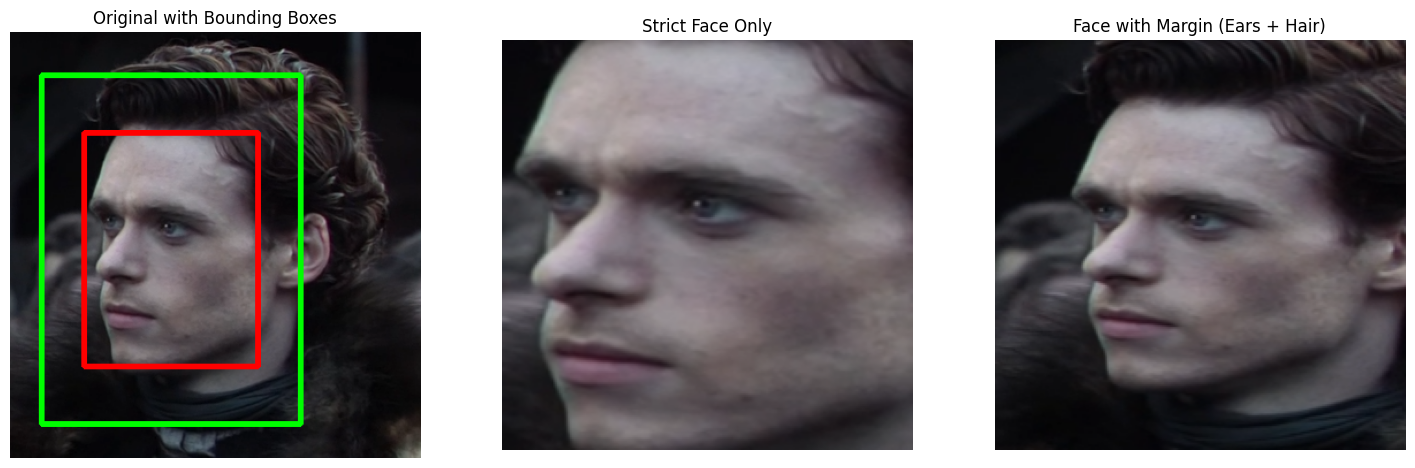

In [7]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# ===== SETTINGS =====
image_path = r"C:\Users\itsme\OneDrive\Pictures\Screenshots\Screenshot 2025-08-28 043244.png"
MARGIN = 0.25   # 25% margin

# ===== FACE DETECTION =====
detector = MTCNN()
img = cv2.imread(image_path)

if img is None:
    print("⚠️ Could not read image, check the path!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for matplotlib
    faces = detector.detect_faces(img_rgb)

    if not faces:
        print("❌ No face found in image!")
    else:
        for face in faces:
            x, y, w, h = face['box']
            x, y = max(0, x), max(0, y)

            # Strict face only (no margin)
            strict_crop = img_rgb[y:y+h, x:x+w]
            strict_resized = cv2.resize(strict_crop, (224, 224))

            # Face with margin
            x_margin = int(w * MARGIN)
            y_margin = int(h * MARGIN)
            x1 = max(0, x - x_margin)
            y1 = max(0, y - y_margin)
            x2 = min(img.shape[1], x + w + x_margin)
            y2 = min(img.shape[0], y + h + y_margin)
            margin_crop = img_rgb[y1:y2, x1:x2]
            margin_resized = cv2.resize(margin_crop, (224, 224))

            # Original with bounding box
            img_copy = img_rgb.copy()
            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 3)
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 3)

            # ==== SHOW ALL 3 ====
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))

            axs[0].imshow(img_copy)
            axs[0].set_title("Original with Bounding Boxes")
            axs[0].axis("off")

            axs[1].imshow(strict_resized)
            axs[1].set_title("Strict Face Only")
            axs[1].axis("off")

            axs[2].imshow(margin_resized)
            axs[2].set_title("Face with Margin (Ears + Hair)")
            axs[2].axis("off")

            plt.show()


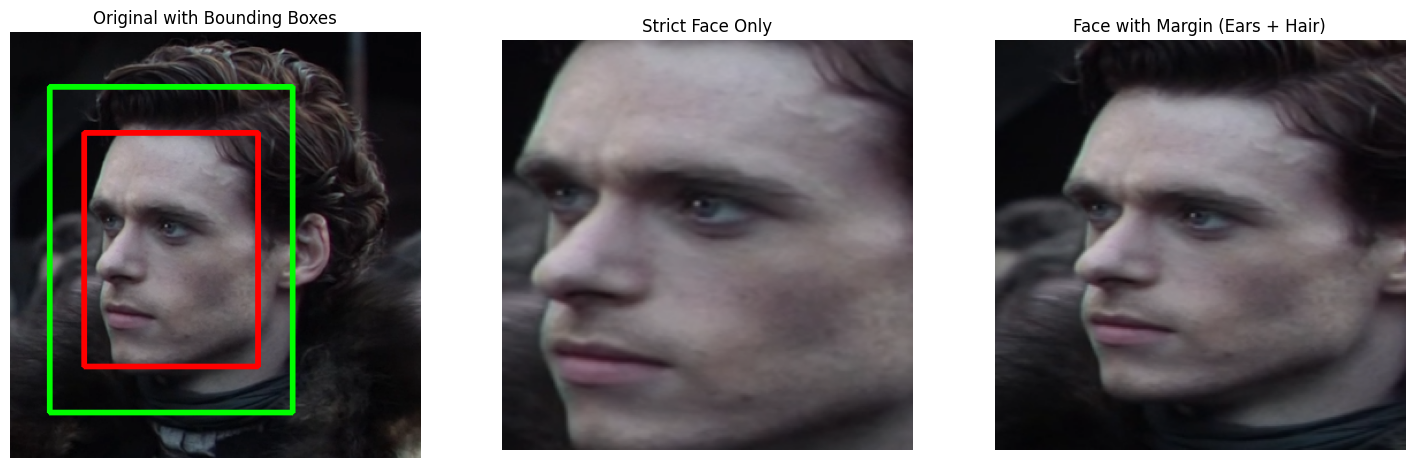

In [2]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# ===== SETTINGS =====
image_path = r"C:\Users\itsme\OneDrive\Pictures\Screenshots\Screenshot 2025-08-28 043244.png"
MARGIN = 0.2  # 25% margin

# ===== FACE DETECTION =====
detector = MTCNN()
img = cv2.imread(image_path)

if img is None:
    print("⚠️ Could not read image, check the path!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for matplotlib
    faces = detector.detect_faces(img_rgb)

    if not faces:
        print("❌ No face found in image!")
    else:
        for face in faces:
            x, y, w, h = face['box']
            x, y = max(0, x), max(0, y)

            # Strict face only (no margin)
            strict_crop = img_rgb[y:y+h, x:x+w]
            strict_resized = cv2.resize(strict_crop, (224, 224))

            # Face with margin
            x_margin = int(w * MARGIN)
            y_margin = int(h * MARGIN)
            x1 = max(0, x - x_margin)
            y1 = max(0, y - y_margin)
            x2 = min(img.shape[1], x + w + x_margin)
            y2 = min(img.shape[0], y + h + y_margin)
            margin_crop = img_rgb[y1:y2, x1:x2]
            margin_resized = cv2.resize(margin_crop, (224, 224))

            # Original with bounding box
            img_copy = img_rgb.copy()
            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 3)
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 3)

            # ==== SHOW ALL 3 ====
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))

            axs[0].imshow(img_copy)
            axs[0].set_title("Original with Bounding Boxes")
            axs[0].axis("off")

            axs[1].imshow(strict_resized)
            axs[1].set_title("Strict Face Only")
            axs[1].axis("off")

            axs[2].imshow(margin_resized)
            axs[2].set_title("Face with Margin (Ears + Hair)")
            axs[2].axis("off")

            plt.show()


In [1]:
import cv2
import os
from mtcnn import MTCNN

# Root input and output paths
raw_image_root = "raw"
output_root = "cropped"

detector = MTCNN()

# Margin percentage (10–30% works well, adjust as needed)
MARGIN = 0.0  # 10% extra around face

# Loop through each character folder
for character in os.listdir(raw_image_root):
    raw_image_folder = os.path.join(raw_image_root, character)
    output_folder = os.path.join(output_root, character)

    if not os.path.isdir(raw_image_folder):
        continue  # skip files, only process folders

    os.makedirs(output_folder, exist_ok=True)
    print(f"\n📂 Processing folder: {character}")

    # Loop through all files in each folder
    for file_name in os.listdir(raw_image_folder):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp')):
            img_path = os.path.join(raw_image_folder, file_name)

            try:
                img = cv2.imread(img_path)

                if img is None:
                    print(f"⚠️ Could not read {img_path}, skipping...")
                    continue

                # ✅ Convert BGR → RGB before detection
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                faces = detector.detect_faces(img_rgb)

                if not faces:
                    print(f"❌ No face found in {file_name}")
                    continue

                for i, face in enumerate(faces):
                    try:
                        x, y, w, h = face['box']
                        x, y = max(0, x), max(0, y)

                        # Apply margin
                        x_margin = int(w * MARGIN)
                        y_margin = int(h * MARGIN)

                        x1 = max(0, x - x_margin)
                        y1 = max(0, y - y_margin)
                        x2 = min(img.shape[1], x + w + x_margin)
                        y2 = min(img.shape[0], y + h + y_margin)

                        # Crop bigger area and resize
                        cropped_face = img[y1:y2, x1:x2]
                        cropped_face_resized = cv2.resize(cropped_face, (224, 224))

                        save_path = os.path.join(
                            output_folder,
                            f"{os.path.splitext(file_name)[0]}_face_{i+1}.jpg"
                        )
                        cv2.imwrite(save_path, cropped_face_resized)
                        print(f"✅ Saved: {save_path}")

                    except Exception as e:
                        print(f"⚠️ Error cropping face in {file_name}: {e}")

            except Exception as e:
                print(f"⚠️ Error processing {file_name}: {e}")



📂 Processing folder: arya
✅ Saved: cropped\arya\frame-128_face_1.jpg
✅ Saved: cropped\arya\frame-128_face_2.jpg
✅ Saved: cropped\arya\frame-129_face_1.jpg
✅ Saved: cropped\arya\frame-132_face_1.jpg
✅ Saved: cropped\arya\frame-133_face_1.jpg
✅ Saved: cropped\arya\frame-134_face_1.jpg
✅ Saved: cropped\arya\frame-167_face_1.jpg
✅ Saved: cropped\arya\frame-168_face_1.jpg
✅ Saved: cropped\arya\frame-381_face_1.jpg
✅ Saved: cropped\arya\frame-382_face_1.jpg
✅ Saved: cropped\arya\frame-383 (1)_face_1.jpg
✅ Saved: cropped\arya\frame-383 (1)_face_2.jpg
✅ Saved: cropped\arya\frame-383 (1)_face_3.jpg
✅ Saved: cropped\arya\frame-383_face_1.jpg
✅ Saved: cropped\arya\frame-384_face_1.jpg
✅ Saved: cropped\arya\frame-388_face_1.jpg
✅ Saved: cropped\arya\frame-389 (1)_face_1.jpg
✅ Saved: cropped\arya\frame-389 (1)_face_2.jpg
✅ Saved: cropped\arya\frame-389 (1)_face_3.jpg
✅ Saved: cropped\arya\frame-389_face_1.jpg
✅ Saved: cropped\arya\frame-390_face_1.jpg
✅ Saved: cropped\arya\frame-407_face_1.jpg
✅ S

In [3]:
#write code to delete images from each folder having more than 25 images 
import os
import random

# Root folder containing cropped faces
root_folder = "cropped_images"

# Maximum number of images to keep per folder
MAX_IMAGES = 25

for character in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, character)

    if not os.path.isdir(folder_path):
        continue  # skip non-folder items

    # Collect all image files
    img_files = [f for f in os.listdir(folder_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp'))]

    if len(img_files) > MAX_IMAGES:
        # Shuffle so we keep a random 25 images (better for ML dataset)
        random.shuffle(img_files)

        # Keep first 25, delete rest
        to_delete = img_files[MAX_IMAGES:]

        for file_name in to_delete:
            file_path = os.path.join(folder_path, file_name)
            try:
                os.remove(file_path)
                print(f"🗑️ Deleted: {file_path}")
            except Exception as e:
                print(f"⚠️ Could not delete {file_path}: {e}")

print("\n✅ Cleanup complete! Each folder in 'cropped_images' now has ≤ 25 images.")


🗑️ Deleted: cropped_images\cersi\74436_face_1.jpg
🗑️ Deleted: cropped_images\jamie\240d3542-0a4b-4307-9244-532b0115cfde_face_1.jpg
🗑️ Deleted: cropped_images\jamie\Jaime Lannister (Nikolaj Coster-Waldau)_face_1.jpg
🗑️ Deleted: cropped_images\jamie\Jaime Lannister (4)_face_1.jpg
🗑️ Deleted: cropped_images\jamie\7f02c03d-10d3-4680-ad49-fc5e42b8f4d5_face_1.jpg
🗑️ Deleted: cropped_images\jamie\74273_face_1.jpg
🗑️ Deleted: cropped_images\jamie\images (4)_face_1.jpg
🗑️ Deleted: cropped_images\jamie\b8976425-7903-4b89-a192-19a60f4f167a_face_1.jpg
🗑️ Deleted: cropped_images\jamie\75144_face_1.jpg
🗑️ Deleted: cropped_images\jamie\1f1166ef-7b5a-4e16-8065-d103064188d9_face_1.jpg
🗑️ Deleted: cropped_images\jamie\8369df64-e460-47a6-bb83-102acf474602_face_1.jpg
🗑️ Deleted: cropped_images\jamie\75149_face_1.jpg
🗑️ Deleted: cropped_images\jamie\images_face_1.jpg
🗑️ Deleted: cropped_images\jamie\79018_face_1.jpg
🗑️ Deleted: cropped_images\jamie\71212_face_1.jpg
🗑️ Deleted: cropped_images\jamie\IMG-2025

In [13]:
#for single file 
import cv2
import os
from mtcnn import MTCNN

# Input and output paths for Rob Stark
raw_image_folder = "raw_images/robstark"
output_folder = "cropped_images/robstark"

detector = MTCNN()
MARGIN = 0.1  # 10% margin around face

# Create output folder if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)
print(f"\n📂 Processing folder: robstark")

# Loop through all image files in robstark folder
for file_name in os.listdir(raw_image_folder):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp')):
        img_path = os.path.join(raw_image_folder, file_name)

        try:
            img = cv2.imread(img_path)

            if img is None:
                print(f"⚠️ Could not read {img_path}, skipping...")
                continue

            # Convert BGR → RGB before detection
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(img_rgb)

            if not faces:
                print(f"❌ No face found in {file_name}")
                continue

            for i, face in enumerate(faces):
                try:
                    x, y, w, h = face['box']
                    x, y = max(0, x), max(0, y)

                    # Apply margin
                    x_margin = int(w * MARGIN)
                    y_margin = int(h * MARGIN)

                    x1 = max(0, x - x_margin)
                    y1 = max(0, y - y_margin)
                    x2 = min(img.shape[1], x + w + x_margin)
                    y2 = min(img.shape[0], y + h + y_margin)

                    # Crop bigger area and resize to 224x224
                    cropped_face = img[y1:y2, x1:x2]
                    cropped_face_resized = cv2.resize(cropped_face, (224, 224))

                    save_path = os.path.join(
                        output_folder,
                        f"{os.path.splitext(file_name)[0]}_face_{i+1}.jpg"
                    )
                    cv2.imwrite(save_path, cropped_face_resized)
                    print(f"✅ Saved: {save_path}")

                except Exception as e:
                    print(f"⚠️ Error cropping face in {file_name}: {e}")

        except Exception as e:
            print(f"⚠️ Error processing {file_name}: {e}")



📂 Processing folder: robstark
✅ Saved: cropped_images/robstark\70934_face_1.jpg
✅ Saved: cropped_images/robstark\70996_face_1.jpg
✅ Saved: cropped_images/robstark\70997_face_1.jpg
✅ Saved: cropped_images/robstark\71028_face_1.jpg
✅ Saved: cropped_images/robstark\71029_face_1.jpg
✅ Saved: cropped_images/robstark\71092_face_1.jpg
✅ Saved: cropped_images/robstark\71106_face_1.jpg
✅ Saved: cropped_images/robstark\71129_face_1.jpg
✅ Saved: cropped_images/robstark\73040_face_1.jpg
✅ Saved: cropped_images/robstark\73533_face_1.jpg
✅ Saved: cropped_images/robstark\73545_face_1.jpg
✅ Saved: cropped_images/robstark\73551_face_1.jpg
✅ Saved: cropped_images/robstark\73556_face_1.jpg
✅ Saved: cropped_images/robstark\73563_face_1.jpg
✅ Saved: cropped_images/robstark\73574_face_1.jpg
✅ Saved: cropped_images/robstark\75982_face_1.jpg
✅ Saved: cropped_images/robstark\75988_face_1.jpg
✅ Saved: cropped_images/robstark\79397_face_1.jpg
✅ Saved: cropped_images/robstark\79399_face_1.jpg
✅ Saved: cropped_im

In [4]:
import os

cropped_root = "cropped_images"

print("📊 Image count per folder:\n")
for character in os.listdir(cropped_root):
    folder_path = os.path.join(cropped_root, character)
    if not os.path.isdir(folder_path):
        continue  # skip if it's not a folder

    # Count images (only valid formats)
    count = sum(
        1 for f in os.listdir(folder_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp'))
    )

    print(f"{character}: {count} images")


📊 Image count per folder:

arya: 20 images
brandon: 18 images
catlynstark: 24 images
cersi: 25 images
jamie: 25 images
joffery: 25 images
johnsnow: 20 images
masterluwin: 12 images
nedstark: 25 images
rackon: 21 images
robert: 25 images
robstark: 21 images
rodrikcassel: 15 images
sansa: 23 images
theon: 25 images


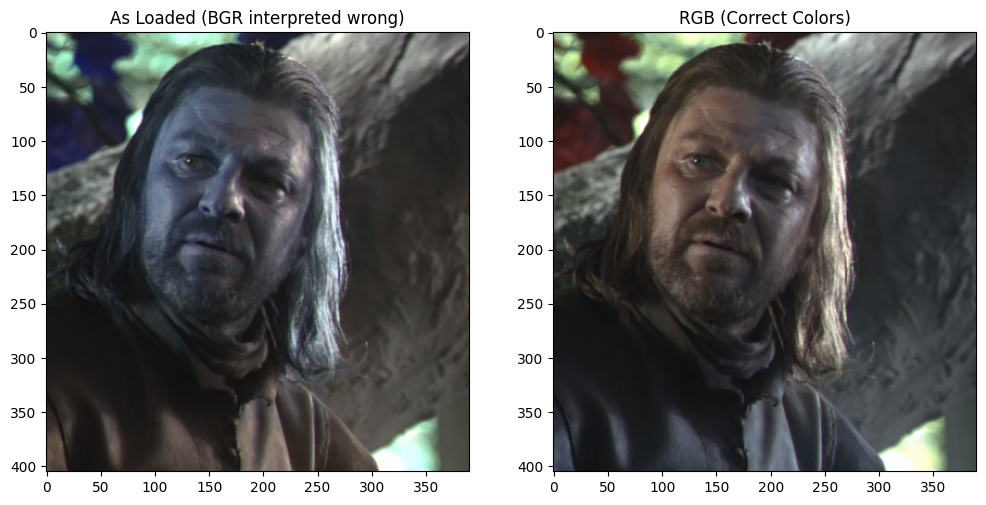

In [9]:
import cv2
import matplotlib.pyplot as plt

# image load karo
img = cv2.imread(r"C:\Users\itsme\OneDrive\Pictures\Screenshots\Screenshot 2025-08-28 210110.png")  # OpenCV -> by default BGR

# BGR ko RGB me convert
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot karte hain original (BGR as loaded) aur RGB converted
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)   # OpenCV BGR direct show (matplotlib RGB expect karta hai -> colors ulte dikhte hain)
plt.title("As Loaded (BGR interpreted wrong)")

plt.subplot(1,2,2)
plt.imshow(img_rgb)   # Correct conversion
plt.title("RGB (Correct Colors)")

plt.show()
